In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

from utils import *
from plot_utils import *
from AnalyseDefects_dev import AnalyseDefects
from AnalyseDefectsAll import AnalyseDefectsAll

In [ ]:
data_suffix='fric10' #'lambda_minus1'
LL = 512
mode = 'all' # 'all' or 'short'

extract = True
analyze = False
merge = False

if data_suffix == 'fric01':
    prefix_list = ['', 'l', 'vl'] #['', 'l', '01']
    suffix_list = ['', 'l', 'vl'] #'01',]# '10']
    Nframes_list = [100, 400, 600] 
    count_suffix = "_periodic_rm0.1"
elif data_suffix == 'fric10':
    prefix_list = ['', 'l'] #['', 'l', '01']
    suffix_list = ['', 'l'] #'01',]# '10']
    Nframes_list = [100, 400] 
    count_suffix = "_periodic_rm0.1"
elif data_suffix == 'fric001':
    prefix_list = ['', 'l'] #['', 'l', '01']
    suffix_list = ['', 'l'] #'01',]# '10']
    Nframes_list = [100, 400] 
    count_suffix = "_periodic_rm0.1"
elif data_suffix == 'lk':
    prefix_list = []
    suffix_list = ['025', '10']
    Nframes_list = [400, 400] 
    count_suffix = "_periodic_rm0.1"
elif data_suffix == 'lbc':
    prefix_list = []
    suffix_list = ['3', '4']
    Nframes_list = [400, 400] 
    count_suffix = "_rm0.1"
elif data_suffix == 'fric':
    prefix_list = []
    suffix_list = ['01', '10']
    Nframes_list = [100, 100] 
    count_suffix = "_periodic_rm0.1"
elif data_suffix == 'lam':
    prefix_list = []
    suffix_list = ['05', '2']
    Nframes_list = [100, 100] 
    count_suffix = "_periodic_rm0.1"

output_path = f'data\\na{LL}{data_suffix}'
save_path = os.path.join(output_path, 'figs')
if not os.path.exists(save_path):
    os.makedirs(save_path)

defect_list = []

if len(prefix_list) > 0:
    for i, prefix in enumerate(prefix_list):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{prefix}{data_suffix}', \
                    suffix = 's' if len(prefix) == 0 else prefix, priority = i, LX = LL, Nframes = Nframes_list[i])
        defect_list.append(data_dict)
else:
    for i, suffix in enumerate(suffix_list):
        data_dict = dict(path = f'X:\\na512exp\\na{LL}{data_suffix}{suffix}', \
                    suffix = suffix, priority = 0, LX = LL, Nframes =  Nframes_list[i])
        defect_list.append(data_dict)


ad = AnalyseDefects(defect_list, output_path=output_path, count_suffix=count_suffix,)

if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()
if merge:
    ad.merge_results(include_sfac=False)

In [ ]:
for N in range(ad.Ndata):
    ad.plot_defects_per_activity(N, save=True)

In [ ]:
ad.update_conv_list()

In [31]:
do_extraction = False
do_basic_analysis = True
do_hyperuniformity_analysis = True
do_merge = True
calc_pcf = False


# hyperuniformity parameters
act_idx_bounds=[0,None]
Npoints_to_fit = 20
dens_fluc_dict = dict(act_idx_bounds = [0, None], window_idx_bounds = [50 - Npoints_to_fit, None])

# sfac fitting parameters
pval_min = 0.05
Nbounds = [4,5]
sfac_dict = dict(Npoints_bounds = Nbounds, act_idx_bounds = act_idx_bounds, pval_min = pval_min)

# temporal correlation parameter
temp_corr_simple = True
nlags = None
ff_idx = None
acf_dict = {'nlags_frac': 0.5, 'nlags': nlags, 'max_lag': None,\
                'alpha': 0.3174, 'max_lag_threshold': 0, 'simple_threshold': 0.2, \
                'first_frame_idx': ff_idx}

if do_extraction:
    ad.extract_results()
if do_basic_analysis:
    if do_hyperuniformity_analysis:
        print(' sfac n bounds:', Nbounds)
        
        ad.analyze_defects(temp_corr_simple=temp_corr_simple,
                            acf_dict=acf_dict,
                            dens_fluc_dict=dens_fluc_dict, 
                            sfac_dict=sfac_dict, 
                            calc_pcf=calc_pcf)
    else:
        ad.analyze_defects(acf_dict=acf_dict,
                            temp_corr_simple=temp_corr_simple)
if do_merge:
    ad.merge_results()

 sfac n bounds: [4, 5]
Non-converged fits (p < 0.05):  3
Non-converged fits (p < 0.05):  1


c:\Users\Simon Andersen\miniconda3\envs\sf\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


In [ ]:
fig, ax = ad.plot_av_defects(use_merged=True)
fig.savefig(os.path.join(ad.output_main_path, 'figs', 'av_defects.png'), bbox_inches='tight')

In [ ]:
fig, ax = ad.plot_alpha_mean(use_merged=True, use_density_fit=False, save=True)


In [ ]:
kbins, sfac = ad.get_sfac_pcf_full(-1)[:2]
sfac_av = np.nanmean(sfac[100:,:,:,:], axis=(0,-1))
act_list = ad.act_list[-1]

fig, ax = plt.subplots()

for i in range(len(act_list)):
    ax.plot(kbins, sfac_av[:,i], label=f'act: {act_list[i]}', lw=2)
ax.legend()

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 4))

act = ad.act_list_merged
sus = ad.get_susceptibility(use_merged=True)

if data_suffix == 'fric10':
    label = rf'$\mu$ = 0.1 x UNIT'
elif data_suffix == 'fric01':
    label = rf'$\mu$ = 0.01 x UNIT'
elif data_suffix == 'fric001':
    label = rf'$\mu$ = 0.001 x UNIT'

    
ax.errorbar(act, sus[:,0], sus[:,1], fmt='d-', elinewidth=1.5, ecolor='black', label = label)
ax.set_xlabel(rf'Activity ($\zeta$)')
ax.set_ylabel(r'Susceptibility $\chi$')
ax.legend()
fig.savefig(os.path.join(ad.output_main_path, 'figs', 'susceptibility.png'), bbox_inches='tight')

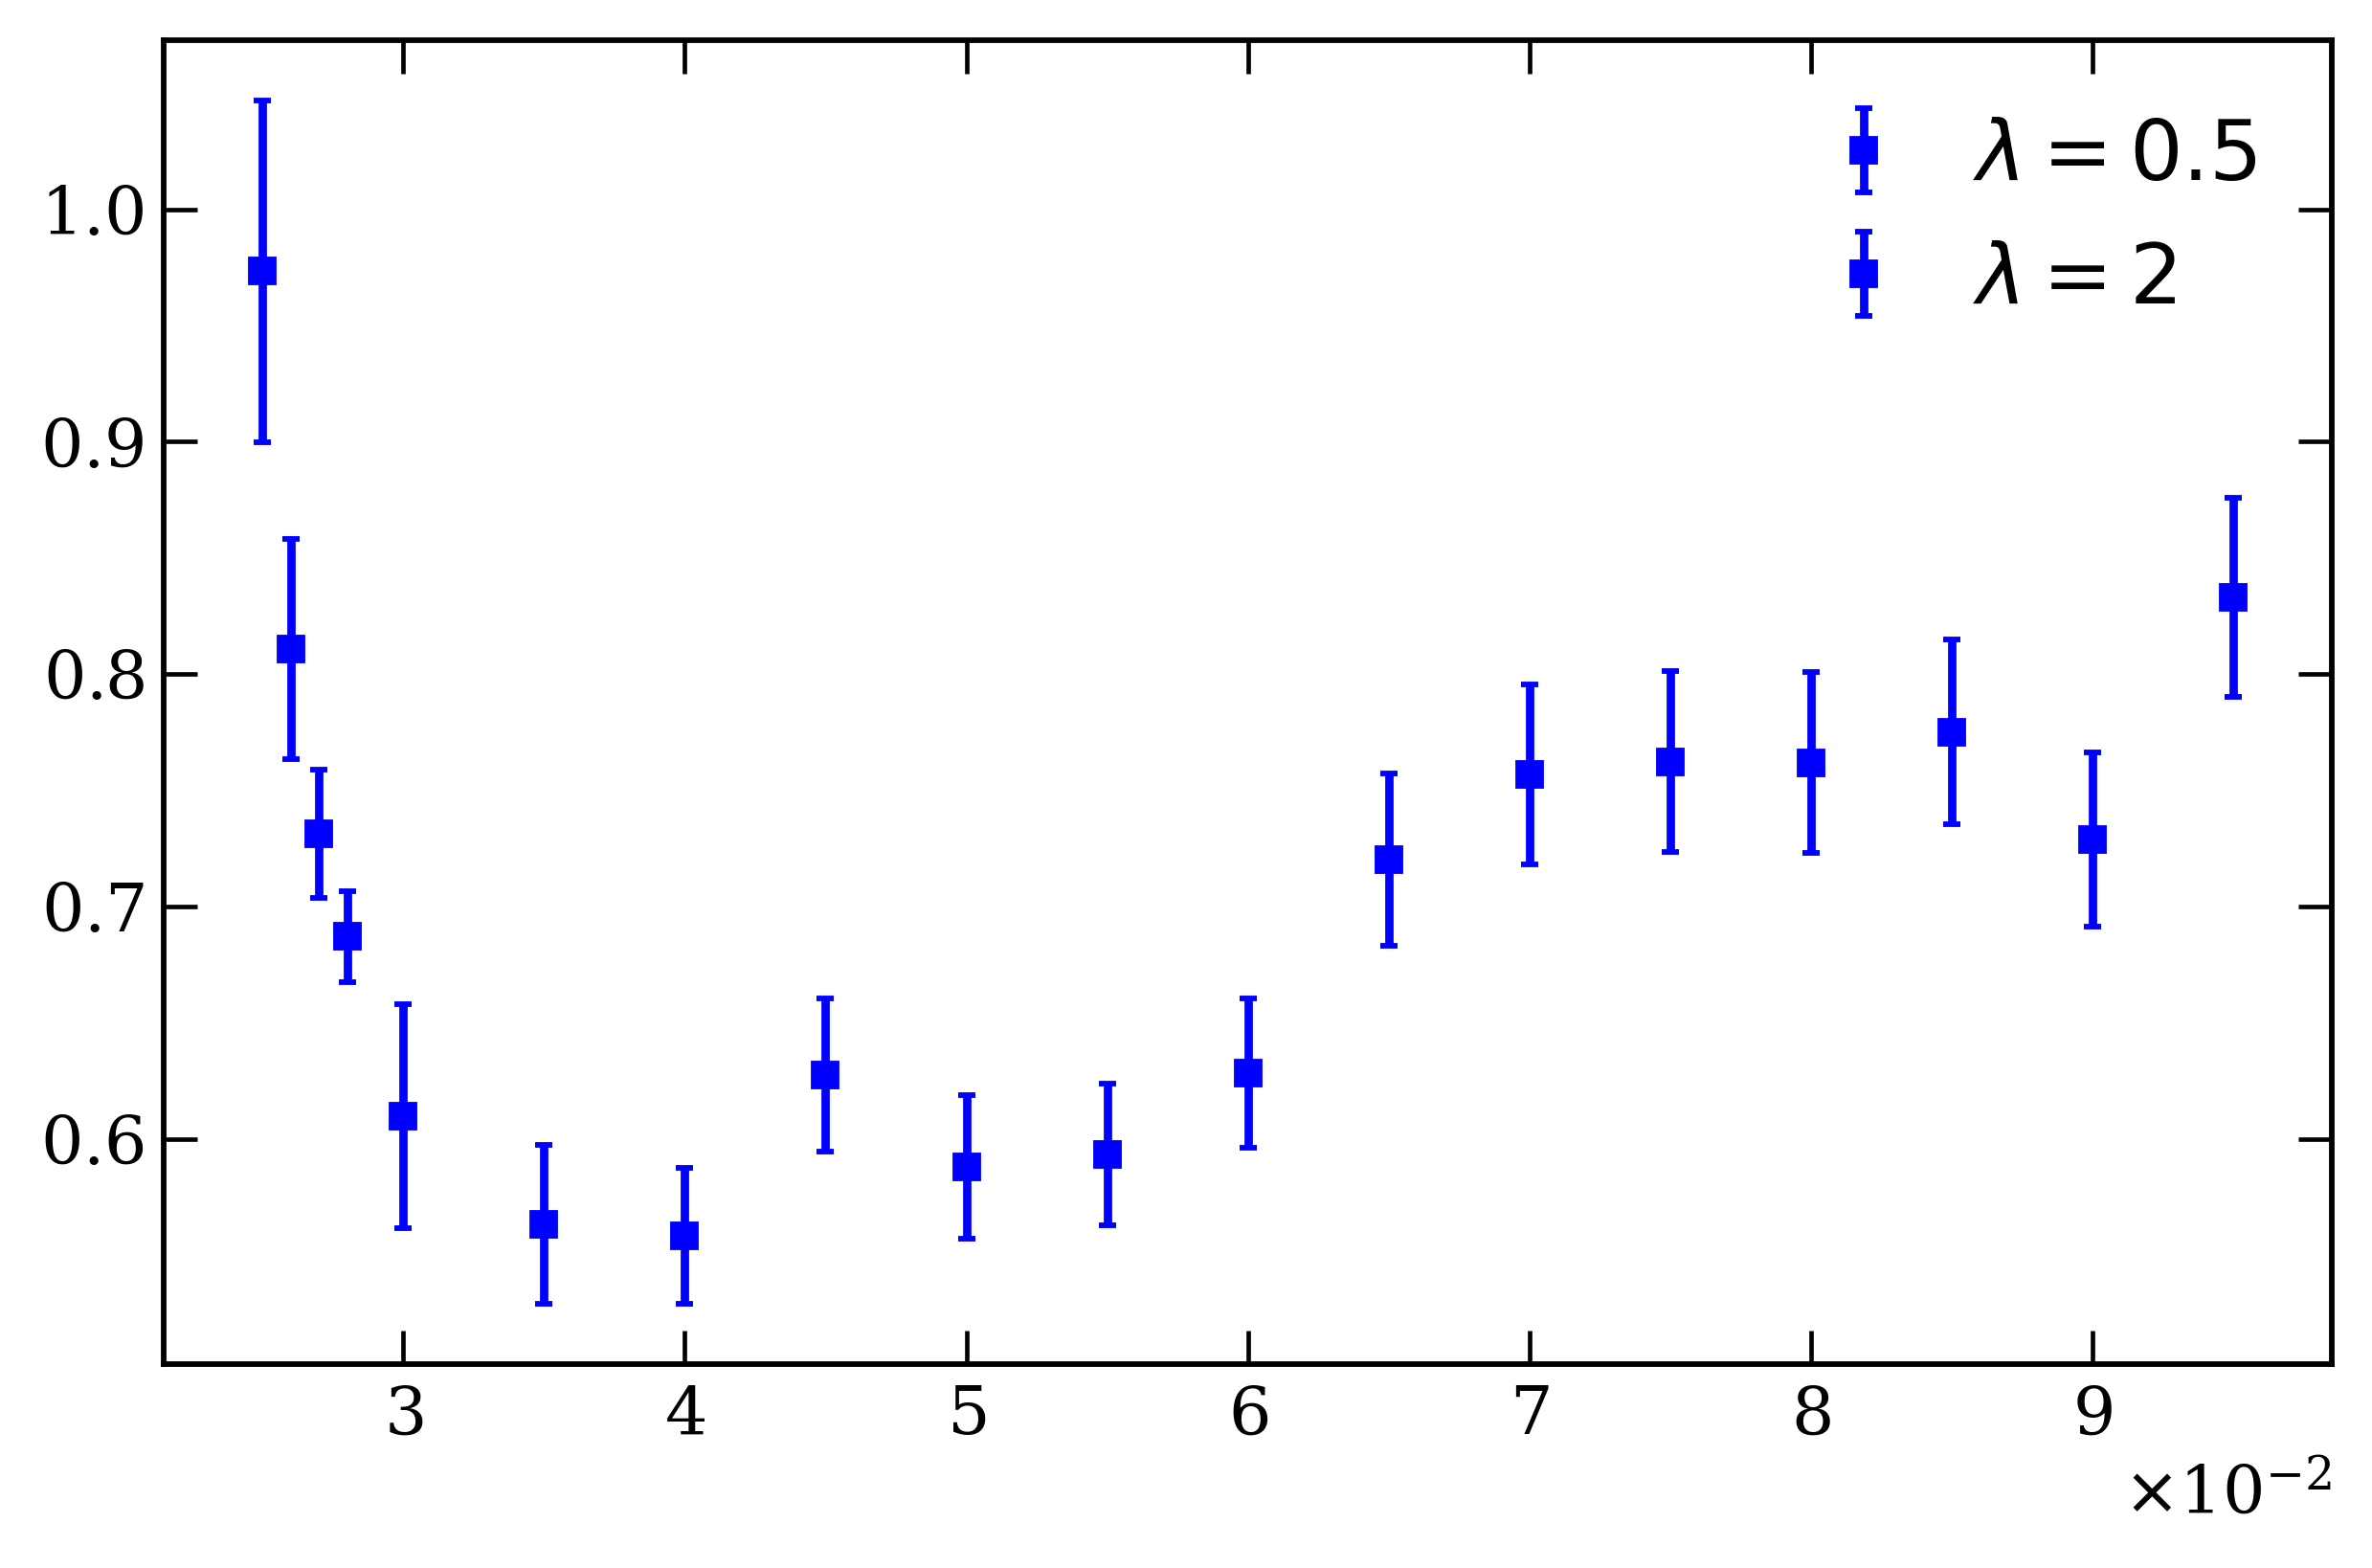

In [ ]:
fig, ax = plt.subplots(1, figsize=(6, 4))
label_list = [rf'$\lambda = 0.5$', 
              rf'$\lambda = 2$']
for N in range(ad.Ndata):
    act = ad.act_list[N]
    sus = ad.get_susceptibility(N)
    ax.errorbar(act, sus[:,0], sus[:,1], label=label_list[N])
ax.legend()
fig.savefig(os.path.join(ad.output_main_path, 'figs', 'susceptibility.png'), bbox_inches='tight')